In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from scipy import stats
from pandas.api.types import CategoricalDtype
import seaborn as sns
import matplotlib.pyplot as plt





In [ ]:
df2 = pd.read_csv('cleaned_dataset_V1.csv',low_memory=False)
df2.Description.unique()

# Prepare DF

<h3>حذف ستون هایی که در این بخش از تحلیل مورد استفاده قرار نخواهند گرفت<h3>

In [12]:
df = pd.read_csv('cleaned_dataset_V1.csv',low_memory=False)
df[['capacity','Risk_category']]= df.Description.str.split(" - ",expand=True)
df.drop(['Description','Inspection Date','City','Risk_category'],axis=1,inplace=True)
df.head()

,Name,Longitude,Latitude,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Points,Grade,Category,capacity
0,#807 TUTTA BELLA,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,5,1.0,3,Seating 0-12
1,#807 TUTTA BELLA,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,RED,5,1.0,3,Seating 0-12
2,#807 TUTTA BELLA,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,BLUE,0,1.0,3,Seating 0-12
3,#807 TUTTA BELLA,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,BLUE,0,1.0,3,Seating 0-12
4,+MAS CAFE,-122.334587,47.648180,Return Inspection,0.0,Satisfactory,False,BLUE,0,2.0,3,Seating 0-12


## 
 بررسی ارتباط بین ستون های باقی ماند
 

In [3]:
correlation_data=df.replace({'Violation Type':{'BLUE':0,'RED':1}})

correlation_data['Violation Type']=correlation_data[['Violation Type']].astype(int)
correlation_data=correlation_data.iloc[:,[4,6,7,8]]
correlation_data.corr()


,Inspection Score,Inspection Closed Business,Violation Type,Violation Points
Inspection Score,1.000000,0.218054,0.460634,0.591615
Inspection Closed Business,0.218054,1.000000,0.041770,0.051581
Violation Type,0.460634,0.041770,1.000000,0.705074
Violation Points,0.591615,0.051581,0.705074,1.000000


<h3 style='color:green'>نکته:<br> Inspection Closed Business<h3>

<h4> ارتباط بسیار کم با دیگر پارامترها <br> بالاترین ارتباط با Inspection Score<h4>

<h4> <h4>

## بررسی بین ۲ پارامتر که بیشترین میزان ارتباط را داشته اند
- Violation Points
- Violation Type

<AxesSubplot:xlabel='Inspection Score', ylabel='Violation Points'>

/Users/arianzarifian/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


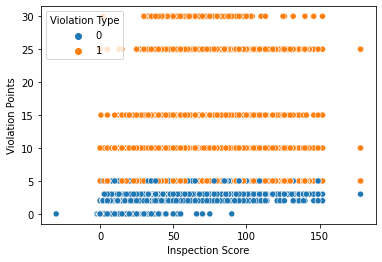

In [4]:
sns.scatterplot(data=correlation_data, x="Inspection Score", y="Violation Points", hue="Violation Type")

<h3 style='color:red'> violation type and violation points<h3>
<h4>با توجه به جدول همبستگی ارتباط ۲ پارامتر <br>
violation typeو violation point<br>
بسیار قوی می باشد و همچنین با کمک از نمودار زیر این موضوع تایید می گردد
در نتیجه :
<br>۱- با دانستن نوع دسته بندی violation type 
<br>۲- کاهش پیچیدگی تحلیل <br>
ستون violation points را حذف می نماییم<h4>

In [22]:
df.drop(['Violation Points'],axis=1,inplace=True)

# Risk Category 1

## بررسی اولیه دیتا

In [23]:
# انتخاب رستوران های سطح ۱
R1=df.loc[df['Category']==1]
R1.drop(['Category'],axis=1,inplace=True)
R1.head(1)

/var/folders/hn/cjgf8lqs607cny8_gr2rmcpc0000gn/T/ipykernel_835/3650485257.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1.drop(['Category'],axis=1,inplace=True)


,Name,Longitude,Latitude,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Grade,capacity
20,100 PERCENT NUTRICION,-122.169114,47.488797,Routine Inspection/Field Review,20.0,Unsatisfactory,False,RED,3.0,Seating 0-12


<h2>همانطور که مشاهده می گردد رستوران های این دسته همگی به طور میانگین دارای 
<br>Grade =1 
<br>همچنین دارای واریانس بسیار کم (کمتر از ۰.۵)
<br>پس برای ساده شدن کار این ستون را حذف می کنیم<h2>

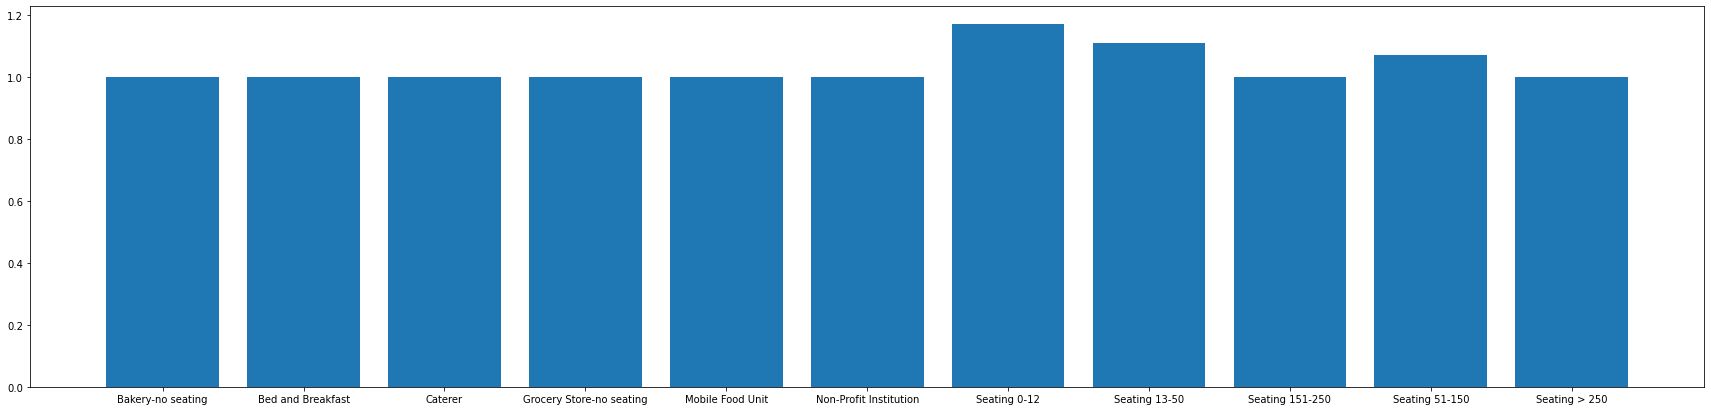

In [7]:
Grade_capacity=R1.groupby(by='capacity',as_index=False).mean()

plt.figure(figsize=(30,7))
plt.bar(Grade_capacity['capacity'],Grade_capacity['Grade'])
plt.show()



In [18]:
Grade_capacity=R1.groupby(by='capacity',as_index=False).std()
Grade_capacity['Grade']



0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.427677
7     0.317897
8     0.000000
9     0.259012
10    0.000000
Name: Grade, dtype: float64

In [19]:
R1.drop(['Grade'],axis=1,inplace=True)
R1.head()


/var/folders/hn/cjgf8lqs607cny8_gr2rmcpc0000gn/T/ipykernel_835/3318864286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R1.drop(['Grade'],axis=1,inplace=True)


,Name,Longitude,Latitude,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Violation Points,Category,capacity
20,100 PERCENT NUTRICION,-122.169114,47.488797,Routine Inspection/Field Review,20.0,Unsatisfactory,False,RED,5,1,Seating 0-12
21,100 PERCENT NUTRICION,-122.169114,47.488797,Routine Inspection/Field Review,20.0,Unsatisfactory,False,RED,10,1,Seating 0-12
22,100 PERCENT NUTRICION,-122.169114,47.488797,Routine Inspection/Field Review,20.0,Unsatisfactory,False,RED,5,1,Seating 0-12
23,100 PERCENT NUTRICION,-122.169114,47.488797,Routine Inspection/Field Review,25.0,Unsatisfactory,False,BLUE,5,1,Seating 0-12
24,100 PERCENT NUTRICION,-122.169114,47.488797,Routine Inspection/Field Review,25.0,Unsatisfactory,False,BLUE,5,1,Seating 0-12


## Inspection Score

<h2>در این مرحله برای بررسی میانگین امتیاز کسب شده توسط گروه های مختلف باید داده های پرت را خارج کنیم<h2>

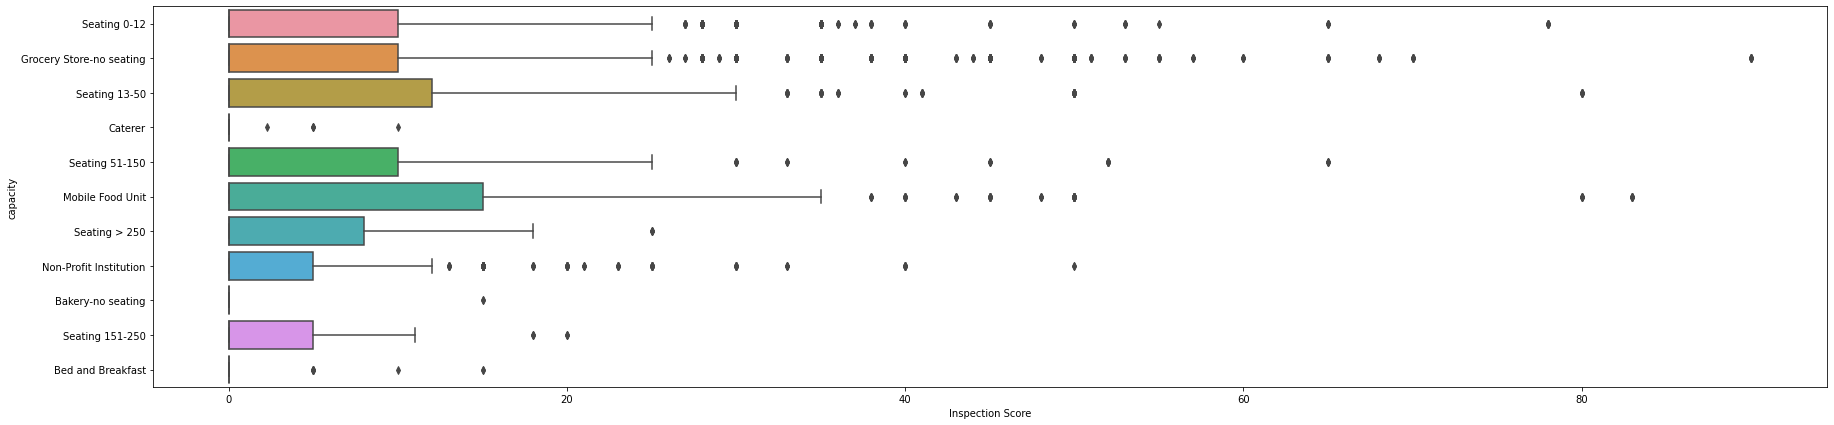

In [9]:
plt.figure(figsize=(30,7))
sns.boxplot(x=R1["Inspection Score"],y=R1["capacity"])
plt.show()

<h4>محاسبه واریانس<h4>

<h4> با بدست اوردن واریانس از این کار صرفه نظر کردیم<h4>

In [10]:
inspection_std=R1.drop(['Longitude','Latitude','Inspection Closed Business'],axis=1).groupby(by='capacity',as_index=False).std()
inspection_std

,capacity,Inspection Score,Category
0,Bakery-no seating,5.633007,0.0
1,Bed and Breakfast,3.167940,0.0
2,Caterer,1.853443,0.0
3,Grocery Store-no seating,11.246940,0.0
4,Mobile Food Unit,17.088310,0.0
5,Non-Profit Institution,7.924571,0.0
6,Seating 0-12,9.908041,0.0
7,Seating 13-50,11.944057,0.0
8,Seating 151-250,6.342567,0.0
9,Seating 51-150,11.059287,0.0


In [36]:
inspection_mean=R1.groupby(by='capacity',as_index=False).mean()
inspection_mean

,capacity,Longitude,Latitude,Inspection Score,Inspection Closed Business,Grade
0,Bakery-no seating,-122.377768,47.584677,2.307692,0.000000,1.000000
1,Bed and Breakfast,-122.091137,47.584903,1.111111,0.000000,1.000000
2,Caterer,-122.240099,47.630962,0.556026,0.000000,1.000000
3,Grocery Store-no seating,-122.252986,47.551772,6.800329,0.000438,1.000000
4,Mobile Food Unit,-122.311987,47.560619,10.634532,0.005755,1.000000
5,Non-Profit Institution,-122.179596,47.517427,4.040573,0.000000,1.000000
6,Seating 0-12,-122.268970,47.559200,6.240926,0.000244,1.169793
7,Seating 13-50,-122.305214,47.615649,7.875086,0.000000,1.110421
8,Seating 151-250,-122.270021,47.573752,4.129630,0.000000,1.000000
9,Seating 51-150,-122.303384,47.622930,6.904762,0.000000,1.072197


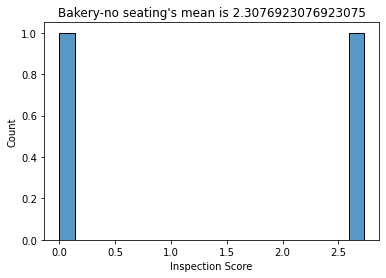

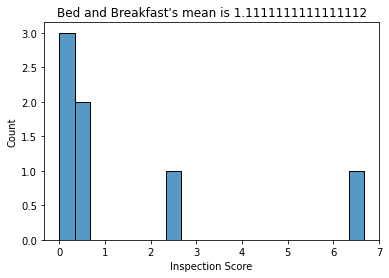

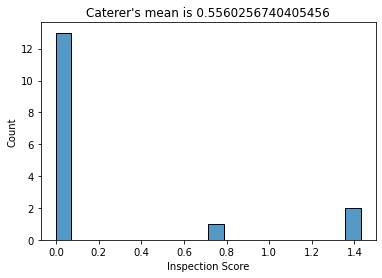

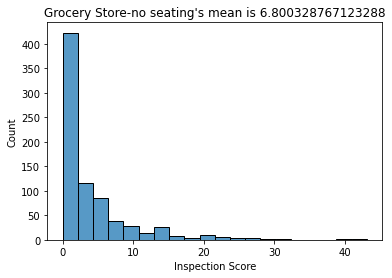

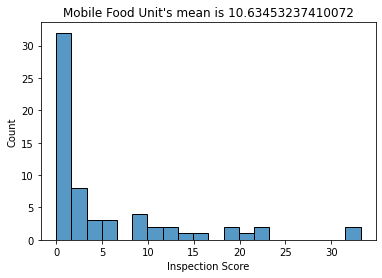

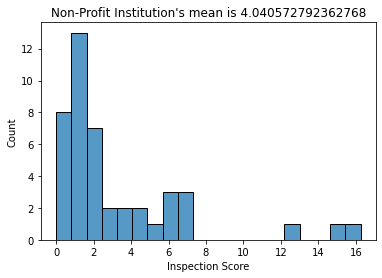

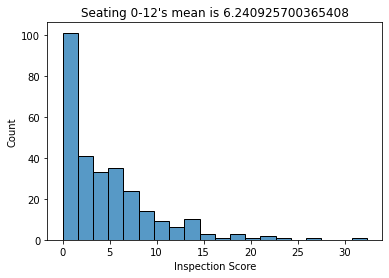

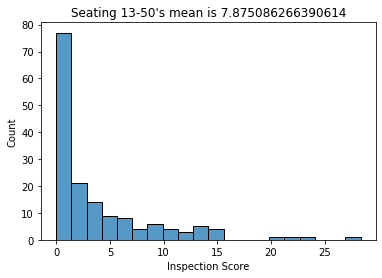

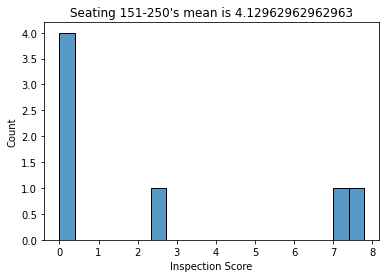

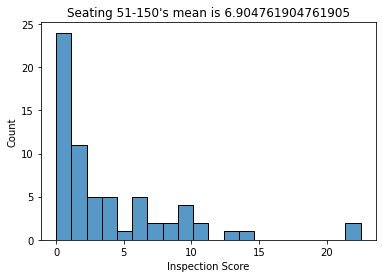

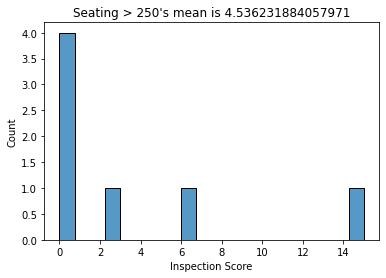

In [29]:

capacity_score=R1.pivot_table(index=['capacity','Name'])
inspection_mean=R1.drop(['Longitude','Latitude','Inspection Closed Business'],axis=1).groupby(by='capacity',as_index=False).mean()
capacities=['Bakery-no seating','Bed and Breakfast',  'Caterer',
       'Grocery Store-no seating', 'Mobile Food Unit', 
       'Non-Profit Institution','Seating 0-12','Seating 13-50','Seating 151-250','Seating 51-150','Seating > 250']

for index,score in enumerate (capacities):
   plt.title(f"{score}'s mean is {inspection_mean['Inspection Score'][index]}" )
   sns.histplot(data=capacity_score.loc[[score]], x="Inspection Score",bins=20)
   plt.show()

<h2>باتوجه به هیستوگرام های رسم شده و همچنین باکس پلات مربوط به این دسته می توان گفت که بخش عمده این دسته نمره های پایینی دریافت کرده اند<h2>

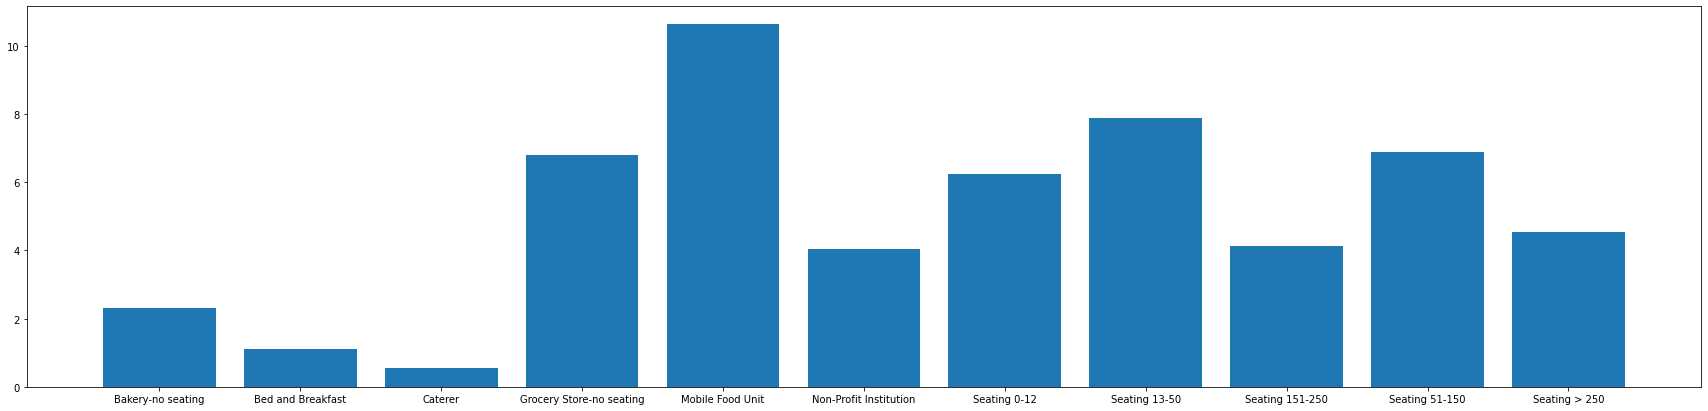

In [ ]:
inspection_mean=R1.drop(['Longitude','Latitude','Inspection Closed Business'],axis=1).groupby(by='capacity',as_index=False).mean()

plt.figure(figsize=(30,7))
plt.bar(x=inspection_mean['capacity'],height=inspection_mean['Inspection Score'])
plt.show()

## Inspection Closed Business

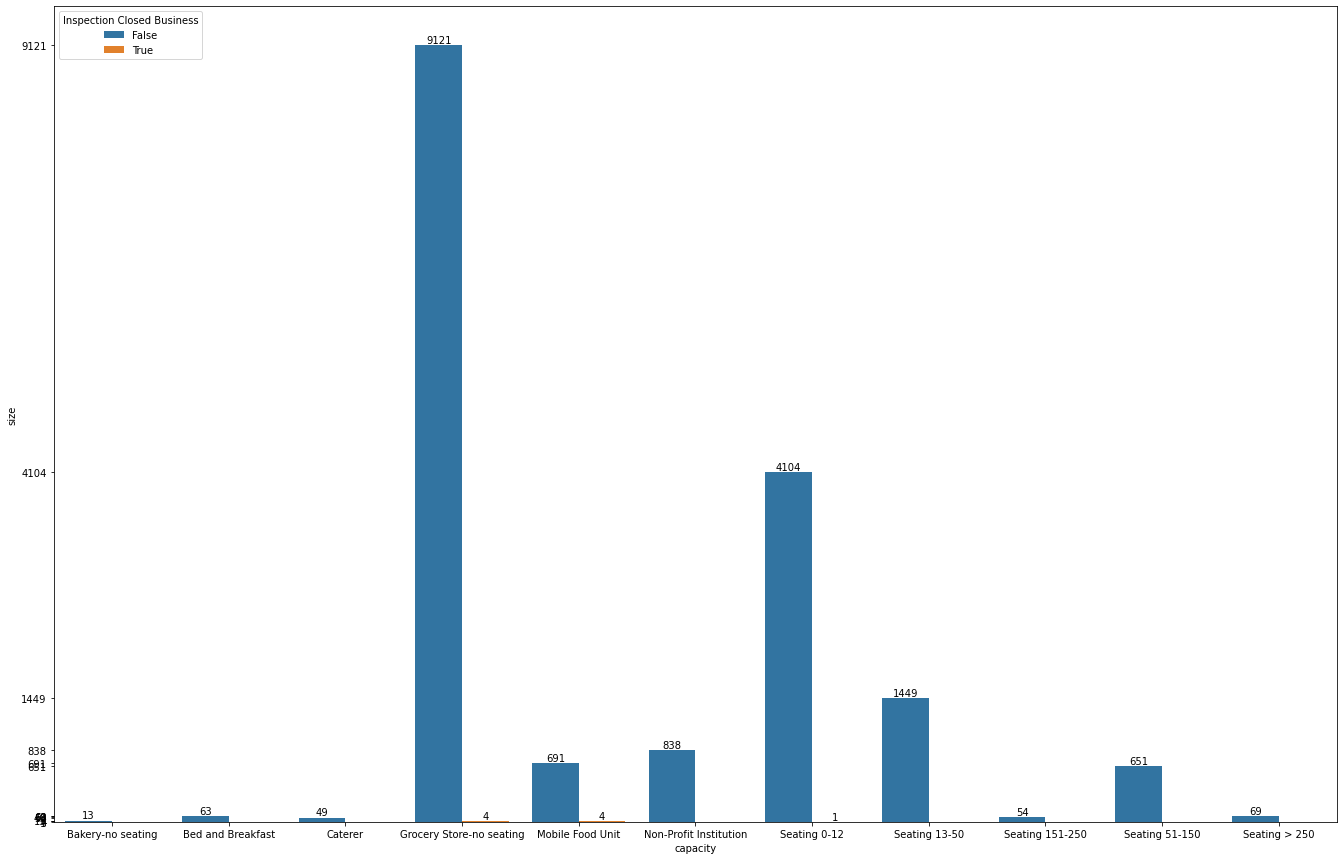

In [ ]:
capacity_colsed=R1.groupby(by=['capacity','Inspection Closed Business'],as_index=False).size()
plt.figure(figsize=(23,15))
bars=sns.barplot(data=capacity_colsed, x="capacity", y="size", hue="Inspection Closed Business")
plt.yticks(capacity_colsed['size'])
for i in bars.containers:
    bars.bar_label(i,)
plt.show()

In [ ]:
capacity_colsed

,capacity,Inspection Closed Business,size
0,Bakery-no seating,False,13
1,Bed and Breakfast,False,63
2,Caterer,False,49
3,Grocery Store-no seating,False,9121
4,Grocery Store-no seating,True,4
5,Mobile Food Unit,False,691
6,Mobile Food Unit,True,4
7,Non-Profit Institution,False,838
8,Seating 0-12,False,4104
9,Seating 0-12,True,1


<h2>در این دسته تعداد اندکی (۹) بیزینس تعطیل شده اند<h2>

<h3> ۸ بیزیننس دارای نتیجه غیر قابل قبول بوده اند<h3>

<h3 style='color:yellow'>فرض : <br>
<br>می توان گفت شرط لازم برای تعطیلی مرکز: نتیجه بررسی (غیر راضی کننده می باشد)<h3>
<h3>
<h3>

In [86]:
mask=R1['Inspection Closed Business']==True
inspection_result=R1[mask]

inspection_result_size=inspection_result.groupby('Inspection Result',as_index=False).size()
inspection_result_size



,Inspection Result,size
0,Satisfactory,1
1,Unsatisfactory,8


In [52]:
inspection_result

,Name,Longitude,Latitude,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Grade,capacity
22375,BEST CORN #1,-122.354232,47.515381,Routine Inspection/Field Review,25.0,Unsatisfactory,True,RED,1.0,Mobile Food Unit
22376,BEST CORN #1,-122.354232,47.515381,Routine Inspection/Field Review,25.0,Unsatisfactory,True,RED,1.0,Mobile Food Unit
49910,DANTE'S INFERNO DOGS (1),-122.382581,47.666475,Routine Inspection/Field Review,35.0,Unsatisfactory,True,RED,1.0,Mobile Food Unit
49911,DANTE'S INFERNO DOGS (1),-122.382581,47.666475,Routine Inspection/Field Review,35.0,Unsatisfactory,True,RED,1.0,Mobile Food Unit
174875,ROTIE CELLARS,-122.334709,47.567158,Routine Inspection/Field Review,2.0,Satisfactory,True,BLUE,4.0,Seating 0-12
212218,SWAGATH HOME FOODS LLS,-122.099447,47.671469,Return Inspection,35.0,Unsatisfactory,True,BLUE,1.0,Grocery Store-no seating
212219,SWAGATH HOME FOODS LLS,-122.099447,47.671469,Return Inspection,35.0,Unsatisfactory,True,RED,1.0,Grocery Store-no seating
212220,SWAGATH HOME FOODS LLS,-122.099447,47.671469,Return Inspection,35.0,Unsatisfactory,True,RED,1.0,Grocery Store-no seating
212221,SWAGATH HOME FOODS LLS,-122.099447,47.671469,Return Inspection,35.0,Unsatisfactory,True,RED,1.0,Grocery Store-no seating


<h3>نکات بدست امده از جدول <br>
- تمام موارد غیر قابل قبول برای بیزینس هایی می باشد که به صورت بیرون بر می باشند<br>
- نوع خطا RED<br>
- دارای نمرات بالا inspection score
- همگی در یک محدوده جغرافیایی می باشند<h3>

<h5>تعداد زیاد RED در قیاس با تعطیلی ها<h5>

In [94]:
mask=R1['Violation Type']=='RED'
inspection_result2=R1[mask]

inspection_result_size=inspection_result.groupby('Violation Type',as_index=False).size()
inspection_result_size

,Violation Type,size
0,BLUE,2
1,RED,7


In [96]:
inspection_result.Name.unique()

array(['BEST CORN #1', "DANTE'S INFERNO DOGS (1)", 'ROTIE CELLARS',
       'SWAGATH HOME FOODS LLS'], dtype=object)

## Inspection Result

# موضاعات قابل طرح    
۱- آیا این دسته از بیزنس ها دارای اهمیت کمی هستند برای تعطیلی؟<br>
۲- ایا نمره پایین علت تعطیل نشدن بوده است؟<br>
## فرضیات
۱- ارنباط مستقیم inspection score و inspection result=Unsatisfactory<br>
۲- شرط لازم برای تعطیلی -Unsatisfactory و - RED<br>
۳- عملکرد ضغیف بیزینس های بیروت بر<br>



# Risk Category 2

## بررسی اولیه دیتا

In [56]:

R2=df.loc[df['Category']==2]
R2.drop(['Category'],axis=1,inplace=True)
R2.head(1)


/var/folders/hn/cjgf8lqs607cny8_gr2rmcpc0000gn/T/ipykernel_835/252493249.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R2.drop(['Category'],axis=1,inplace=True)


,Name,Longitude,Latitude,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Grade,capacity
47,100TH AVE CAKES,-122.133729,47.68723,Consultation/Education - Field,0.0,Complete,False,BLUE,1.0,Bakery-no seating


<h2>همانطور که مشاهده می گردد رستوران های این دسته همگی به طور میانگین دارای 
<br>Grade =1 
<br>همچنین دارای واریانس بسیار کم (کمتر از ۰.۴)
<br>پس برای ساده شدن کار این ستون را حذف می کنیم<h2>
<h3 style='color:blue'> ماننددسته اول<h3>

In [58]:
Grade_capacity2=R2.groupby(by='capacity',as_index=False).std()
Grade_capacity2['Grade']

0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.374064
7     0.357450
8     0.000000
9     0.194359
10    0.000000
Name: Grade, dtype: float64

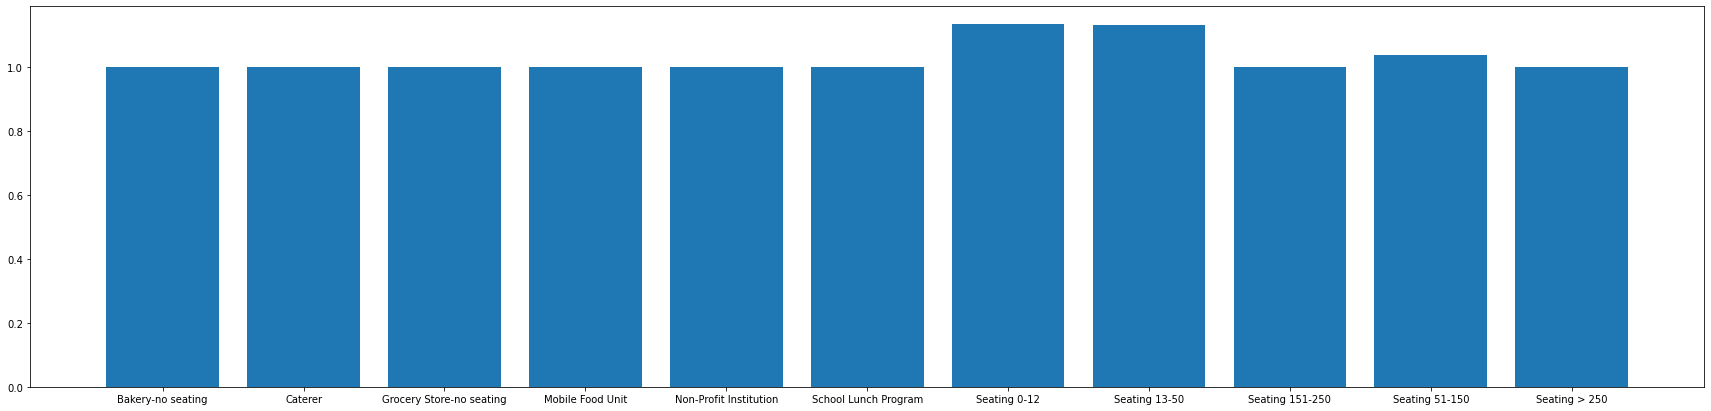

In [59]:
Grade_capacity2=R2.groupby(by='capacity',as_index=False).mean()

plt.figure(figsize=(30,7))
plt.bar(Grade_capacity2['capacity'],Grade_capacity2['Grade'])
plt.show()

In [60]:
R2.drop(['Grade'],axis=1,inplace=True)
R2.head()

/var/folders/hn/cjgf8lqs607cny8_gr2rmcpc0000gn/T/ipykernel_835/773933874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R2.drop(['Grade'],axis=1,inplace=True)


,Name,Longitude,Latitude,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,capacity
47,100TH AVE CAKES,-122.133729,47.68723,Consultation/Education - Field,0.0,Complete,False,BLUE,Bakery-no seating
48,100TH AVE CAKES,-122.133729,47.68723,Routine Inspection/Field Review,0.0,Complete,False,BLUE,Bakery-no seating
49,100TH AVE CAKES,-122.133729,47.68723,Routine Inspection/Field Review,0.0,Satisfactory,False,BLUE,Bakery-no seating
401,203 DEGREES FAHRENHEIT COFFEE,-122.180170,47.71251,Routine Inspection/Field Review,0.0,Satisfactory,False,BLUE,Seating 13-50
402,203 DEGREES FAHRENHEIT COFFEE,-122.180170,47.71251,Routine Inspection/Field Review,0.0,Satisfactory,False,BLUE,Seating 13-50


## Inspection Score

<h2>در این مرحله برای بررسی میانگین امتیاز کسب شده توسط گروه های مختلف باید داده های پرت را خارج کنیم<h2>

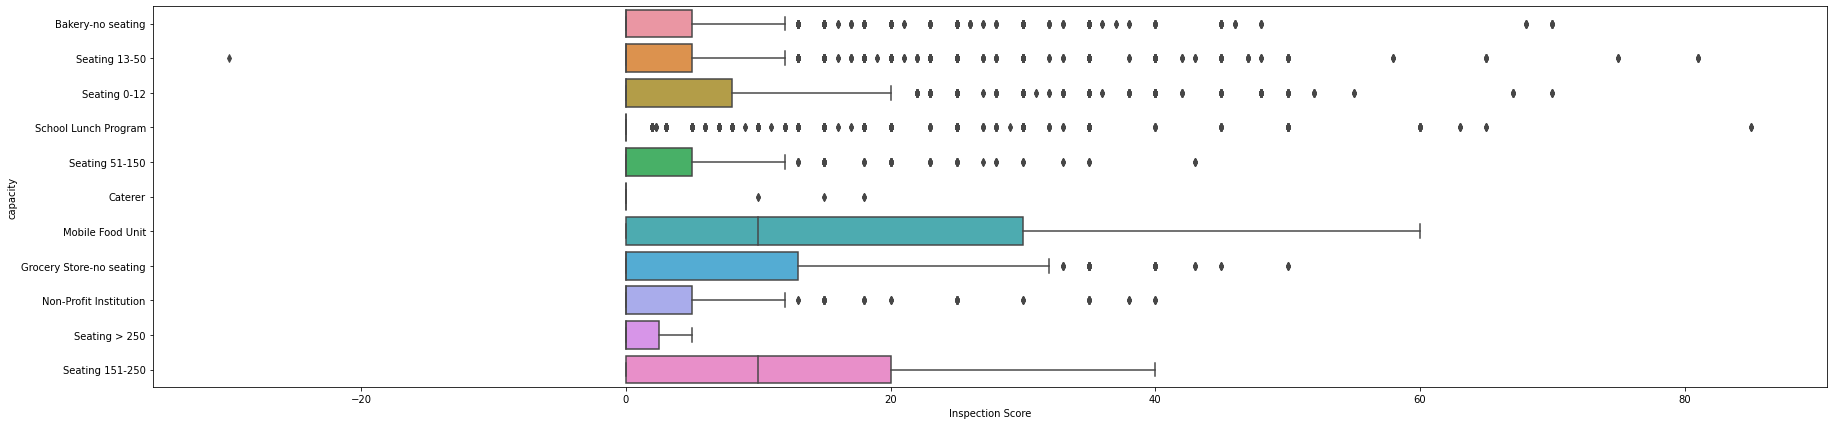

In [104]:

plt.figure(figsize=(30,7))
sns.boxplot(x=R2["Inspection Score"],y=R2["capacity"])
plt.show()

In [62]:
inspection_std2=R2.drop(['Longitude','Latitude','Inspection Closed Business'],axis=1).groupby(by='capacity',as_index=False).std()
inspection_std2

,capacity,Inspection Score
0,Bakery-no seating,9.647374
1,Caterer,4.836550
2,Grocery Store-no seating,10.340172
3,Mobile Food Unit,18.547526
4,Non-Profit Institution,8.529709
5,School Lunch Program,7.382584
6,Seating 0-12,9.690641
7,Seating 13-50,9.745300
8,Seating 151-250,13.881771
9,Seating 51-150,7.522471


<h4>باتوجه به واریانس و باکس پلات تنها ردیفی که دارای نمره منفی می باشد را از دیتا حذف می کنیم<h4>

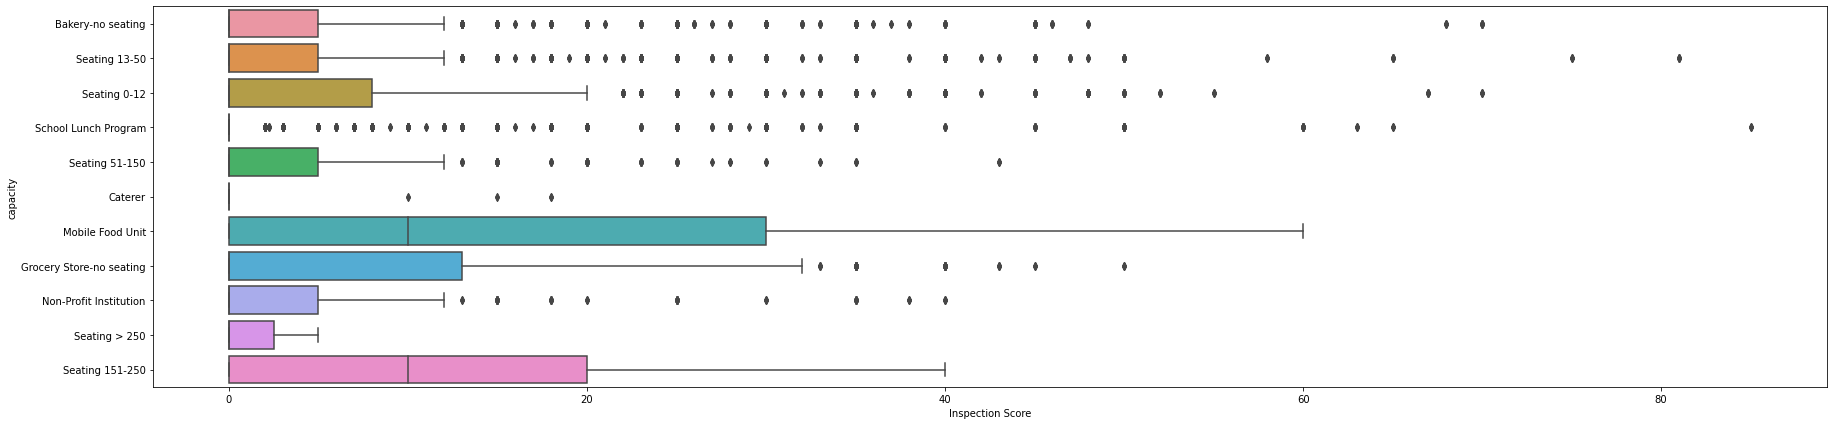

In [72]:
wrong_data=R2.loc[R2['Inspection Score']<0].index
# delete the row and R2 modified
R2_m=R2.drop(wrong_data)
plt.figure(figsize=(30,7))
sns.boxplot(x=R2_m["Inspection Score"],y=R2_m["capacity"])
plt.show()


In [76]:
inspection_mean2=R2_m.drop(['Longitude','Latitude','Inspection Closed Business'],axis=1).groupby(by='capacity',as_index=False).mean()
inspection_mean2

,capacity,Inspection Score
0,Bakery-no seating,4.977209
1,Caterer,1.650794
2,Grocery Store-no seating,7.177128
3,Mobile Food Unit,16.367556
4,Non-Profit Institution,4.097561
5,School Lunch Program,2.883900
6,Seating 0-12,5.211111
7,Seating 13-50,5.012806
8,Seating 151-250,14.391304
9,Seating 51-150,4.057325


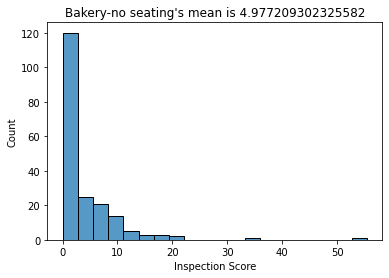

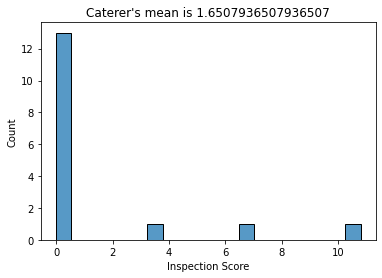

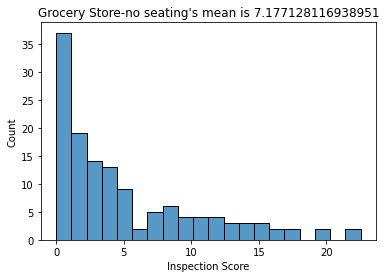

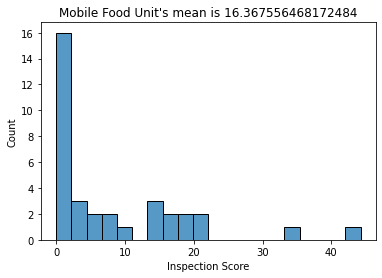

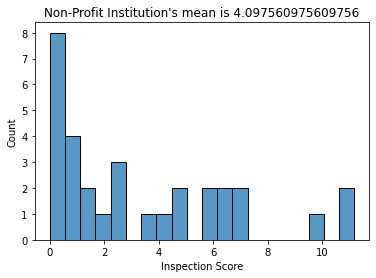

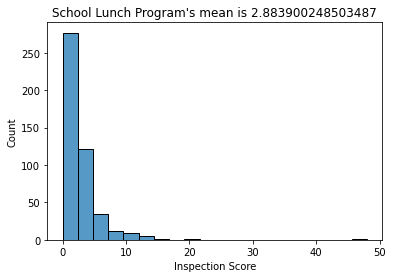

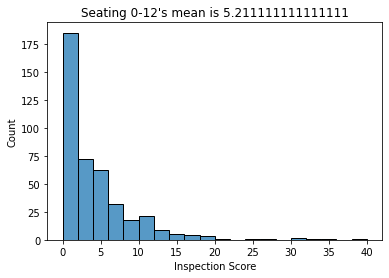

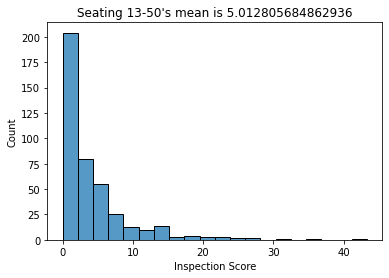

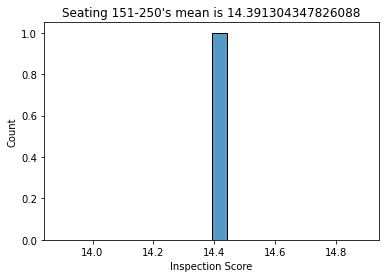

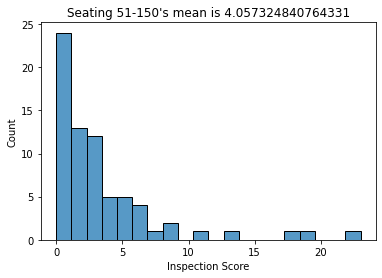

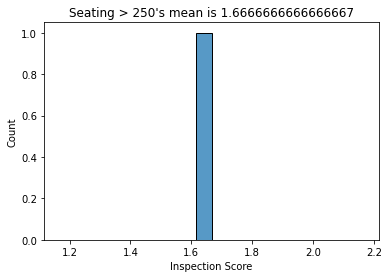

In [80]:

capacity_score2=R2_m.pivot_table(index=['capacity','Name'])

capacities2=['Bakery-no seating','Caterer',
       'Grocery Store-no seating', 'Mobile Food Unit', 
       'Non-Profit Institution','School Lunch Program','Seating 0-12','Seating 13-50','Seating 151-250','Seating 51-150','Seating > 250']

for index,score in enumerate (capacities2):
   plt.title(f"{score}'s mean is {inspection_mean2['Inspection Score'][index]}" )
   sns.histplot(data=capacity_score2.loc[[score]], x="Inspection Score",bins=20)
   plt.show()

<h3> به صورت کلی تغییر محسوسی در قیاس با دسته قبلی به جز چند گروه مشاهده نشد<br><h3>
<h3 style='color:green'> نکته<br>
روند مشاهده شده این فرض را ایجاد می کند تا درگروه های دیگر هیستوگرام به سمت نمرات بالاتر میل کند<h3>

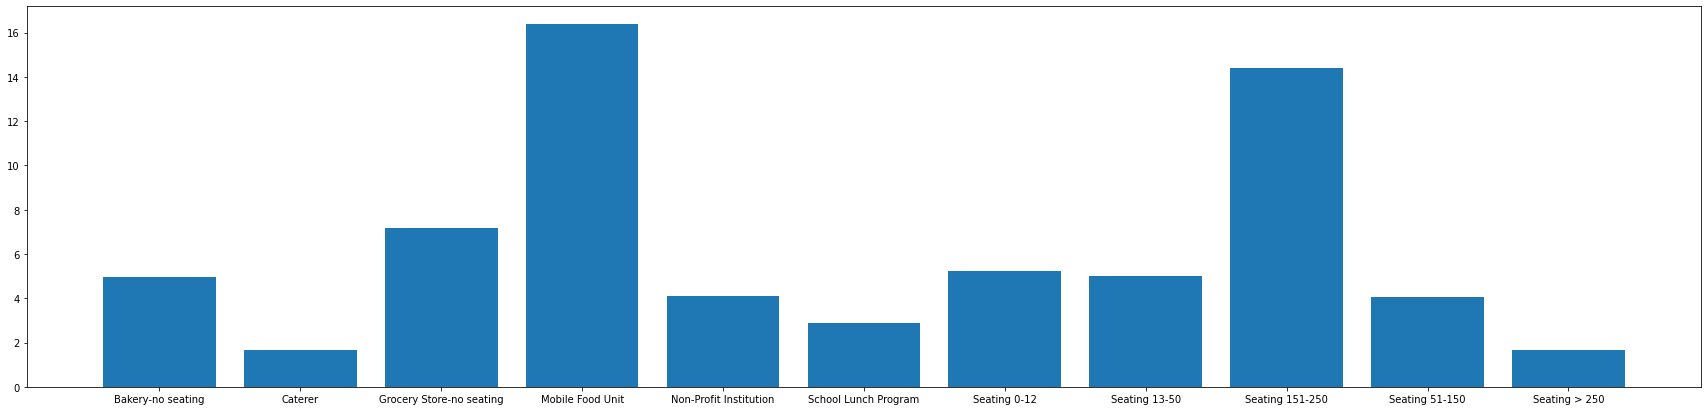

In [79]:


plt.figure(figsize=(30,7))
plt.bar(x=inspection_mean2['capacity'],height=inspection_mean2['Inspection Score'])
plt.show()

## Inspection Closed Business

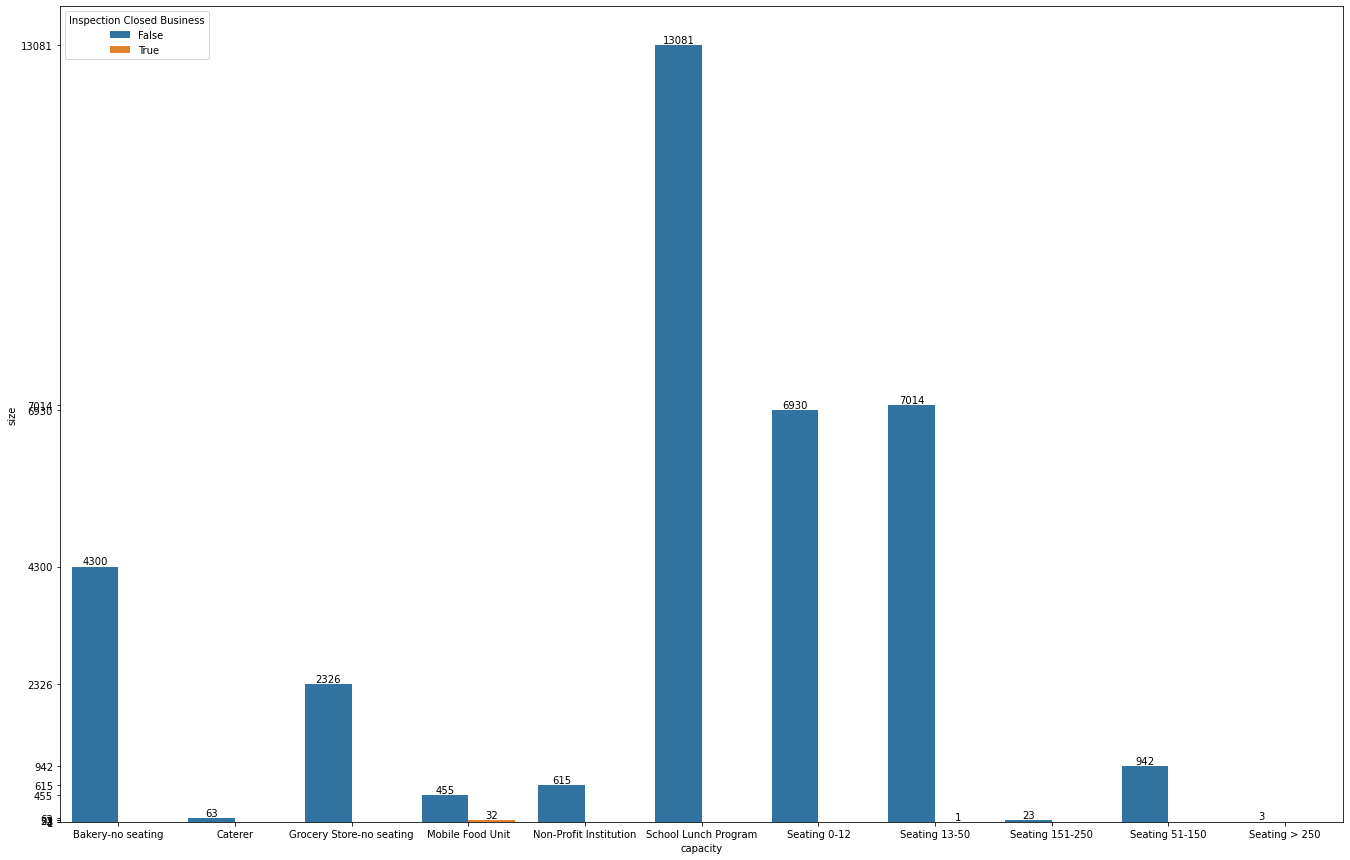

In [81]:
capacity_colsed2=R2_m.groupby(by=['capacity','Inspection Closed Business'],as_index=False).size()
plt.figure(figsize=(23,15))
bars=sns.barplot(data=capacity_colsed2, x="capacity", y="size", hue="Inspection Closed Business")
plt.yticks(capacity_colsed2['size'])
for i in bars.containers:
    bars.bar_label(i,)
plt.show()

In [82]:
capacity_colsed2

,capacity,Inspection Closed Business,size
0,Bakery-no seating,False,4300
1,Caterer,False,63
2,Grocery Store-no seating,False,2326
3,Mobile Food Unit,False,455
4,Mobile Food Unit,True,32
5,Non-Profit Institution,False,615
6,School Lunch Program,False,13081
7,Seating 0-12,False,6930
8,Seating 13-50,False,7014
9,Seating 13-50,True,1


<h3>در ایت دسته تعداد بسیار بیشتری نسبت به دسته قبلی تعطیلی مرکز داشته ایم (۳۳ مورد) تقریبا بیش از ۳ برابر<br>
Mobile Food Unit در جایگاه نخست قرار گرقته است .مانند دسته قبلی <h3>

In [95]:
mask2=R2_m['Inspection Closed Business']==True
inspection_result2=R2_m[mask2]

inspection_result_size2=inspection_result2.groupby('Inspection Result',as_index=False).size()
inspection_result_size2

,Inspection Result,size
0,Not Accessible,1
1,Unsatisfactory,32


<h3 style='color:yellow'>فرض : <br>
<br>می توان گفت شرط لازم برای تعطیلی مرکز: نتیجه بررسی (غیر قابل می باشد)
 مانند دسته قبلی، مراکز تعطیل شده Unsatisfactory می باشند <h3>

In [89]:
inspection_result.groupby('Inspection Score').size()

Inspection Score
2.0     1
25.0    2
35.0    6
dtype: int64

In [92]:
inspection_result

,Name,Longitude,Latitude,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Grade,capacity
22375,BEST CORN #1,-122.354232,47.515381,Routine Inspection/Field Review,25.0,Unsatisfactory,True,RED,1.0,Mobile Food Unit
22376,BEST CORN #1,-122.354232,47.515381,Routine Inspection/Field Review,25.0,Unsatisfactory,True,RED,1.0,Mobile Food Unit
49910,DANTE'S INFERNO DOGS (1),-122.382581,47.666475,Routine Inspection/Field Review,35.0,Unsatisfactory,True,RED,1.0,Mobile Food Unit
49911,DANTE'S INFERNO DOGS (1),-122.382581,47.666475,Routine Inspection/Field Review,35.0,Unsatisfactory,True,RED,1.0,Mobile Food Unit
174875,ROTIE CELLARS,-122.334709,47.567158,Routine Inspection/Field Review,2.0,Satisfactory,True,BLUE,4.0,Seating 0-12
212218,SWAGATH HOME FOODS LLS,-122.099447,47.671469,Return Inspection,35.0,Unsatisfactory,True,BLUE,1.0,Grocery Store-no seating
212219,SWAGATH HOME FOODS LLS,-122.099447,47.671469,Return Inspection,35.0,Unsatisfactory,True,RED,1.0,Grocery Store-no seating
212220,SWAGATH HOME FOODS LLS,-122.099447,47.671469,Return Inspection,35.0,Unsatisfactory,True,RED,1.0,Grocery Store-no seating
212221,SWAGATH HOME FOODS LLS,-122.099447,47.671469,Return Inspection,35.0,Unsatisfactory,True,RED,1.0,Grocery Store-no seating


In [93]:
inspection_result.Name.unique()

array(['BEST CORN #1', "DANTE'S INFERNO DOGS (1)", 'ROTIE CELLARS',
       'SWAGATH HOME FOODS LLS'], dtype=object)

In [88]:
inspection_result.groupby('Violation Type').size()

Violation Type
BLUE    2
RED     7
dtype: int64

<h3>نکات بدست امده از جدول <br>
- تمام موارد غیر قابل قبول برای بیزینس هایی می باشد که به صورت بیرون بر می باشند<br>
- نوع خطا RED<br>
- دارای نمرات بالا inspection score<br>
- همگی در یک محدوده جغرافیایی می باشند<br>
- مانند دسته قبلی بیزینس های تعطیل شده همان قبلی ها می باشند<br>
'BEST CORN #1', "DANTE'S INFERNO DOGS (1)", 'ROTIE CELLARS',
       'SWAGATH HOME FOODS LLS'<h3>

# موضاعات قابل طرح  
  
۱- آیا این دسته از بیزنس ها دارای اهمیت کمی هستند برای تعطیلی؟<br>
<h5 style='color:orange'>با افزایش سطح ریسک میزان تعطیلی ها بیشتر شده است و این میتواند تاییدی باشد بر اینکه<br> 
risk category <br>
برای تعطیلی ها نقش مهمی ایفا می کند
<h5><br>
۲- ایا نمره پایین علت تعطیل نشدن بوده است؟<br>
<h5 style='color:orange'> نمی توان با قطعیت گفت . <h5>

## فرضیات

۱- ارنباط مستقیم inspection score و inspection result=Unsatisfactory<br>
۲- شرط لازم برای تعطیلی -Unsatisfactory و - RED<br>
همچنین نمرات بالا inspection score
۳- عملکرد ضغیف بیزینس های بیروت بر<br>  

۴- با افزایش سطح ریسک میزان نمرات نیز افزایش می یابد(inspection score)

# Risk Category 3

## بررسی اولیه دیتا

In [122]:
R3=df.loc[df['Category']==3]
R3.drop(['Category'],axis=1,inplace=True)
R3.head(1)

/var/folders/hn/cjgf8lqs607cny8_gr2rmcpc0000gn/T/ipykernel_835/966942796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R3.drop(['Category'],axis=1,inplace=True)


,Name,Longitude,Latitude,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Grade,capacity
0,#807 TUTTA BELLA,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,1.0,Seating 0-12


<h2>همانطور که مشاهده می گردد رستوران های این دسته همگی به طور میانگین دارای 
<br>Grade =1 
<br>همچنین دارای واریانس بسیار کم (کمتر از ۰.6)
<br>پس برای ساده شدن کار این ستون را حذف می کنیم<h2>
<h3 style='color:blue'> مانند دیگر دسته ها<h3>


<h3 style='color:green'>شاهد افزایش در رستوران های دارای ظرفیت هستیم<h3>

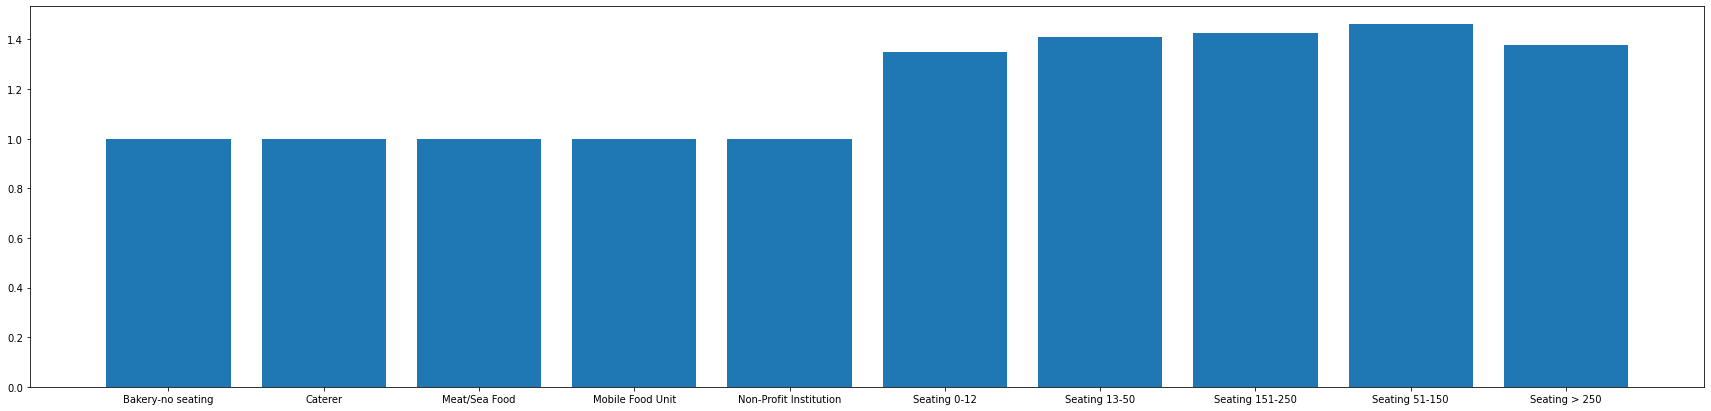

In [99]:
Grade_capacity3=R3.groupby(by='capacity',as_index=False).mean()

plt.figure(figsize=(30,7))
plt.bar(Grade_capacity3['capacity'],Grade_capacity3['Grade'])
plt.show()

In [101]:
Grade_capacity3=R3.groupby(by='capacity',as_index=False).std()
Grade_capacity3['Grade']

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.000000
5    0.563234
6    0.573563
7    0.595140
8    0.634103
9    0.528055
Name: Grade, dtype: float64

In [102]:
R3.drop(['Grade'],axis=1,inplace=True)
R3.head()

/var/folders/hn/cjgf8lqs607cny8_gr2rmcpc0000gn/T/ipykernel_835/2317891953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  R3.drop(['Grade'],axis=1,inplace=True)


,Name,Longitude,Latitude,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,capacity
0,#807 TUTTA BELLA,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,BLUE,Seating 0-12
1,#807 TUTTA BELLA,-122.296415,47.662311,Routine Inspection/Field Review,10.0,Unsatisfactory,False,RED,Seating 0-12
2,#807 TUTTA BELLA,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,BLUE,Seating 0-12
3,#807 TUTTA BELLA,-122.296415,47.662311,Routine Inspection/Field Review,0.0,Satisfactory,False,BLUE,Seating 0-12
4,+MAS CAFE,-122.334587,47.648180,Return Inspection,0.0,Satisfactory,False,BLUE,Seating 0-12


## Inspection Score

<h2>در این مرحله برای بررسی میانگین امتیاز کسب شده توسط گروه های مختلف باید داده های پرت را خارج کنیم<h2>

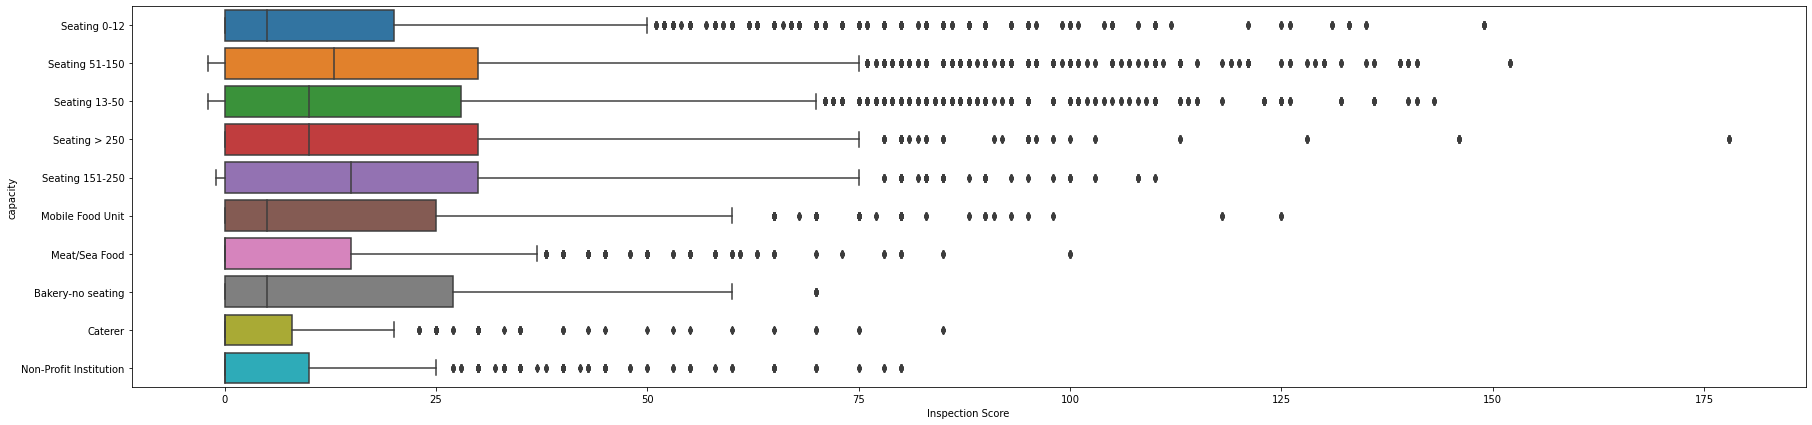

In [105]:

plt.figure(figsize=(30,7))
sns.boxplot(x=R3["Inspection Score"],y=R3["capacity"])
plt.show()

In [106]:
inspection_std3=R3.drop(['Longitude','Latitude','Inspection Closed Business'],axis=1).groupby(by='capacity',as_index=False).std()
inspection_std3

,capacity,Inspection Score,Grade
0,Bakery-no seating,23.286493,0.000000
1,Caterer,12.655402,0.000000
2,Meat/Sea Food,12.914105,0.000000
3,Mobile Food Unit,23.672694,0.000000
4,Non-Profit Institution,12.435406,0.000000
5,Seating 0-12,19.814209,0.563234
6,Seating 13-50,22.075213,0.573563
7,Seating 151-250,21.596399,0.595140
8,Seating 51-150,23.536438,0.634103
9,Seating > 250,23.738357,0.528055


<h4>داده هایی که دارای نمره منفی هستد را حذف می کنیم<h4>

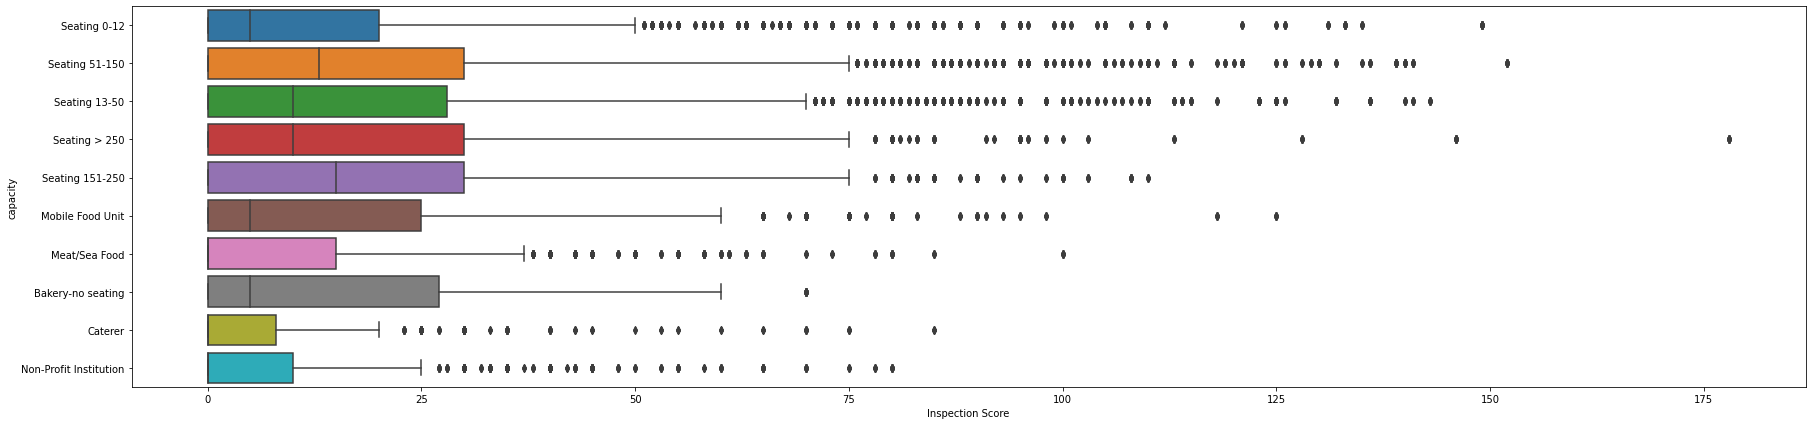

In [126]:
wrong_data3=R3.loc[R3['Inspection Score']<0].index
# delete the row and R3 modified
R3_m=R3.drop(wrong_data3)
plt.figure(figsize=(30,7))
sns.boxplot(x=R3_m["Inspection Score"],y=R3_m["capacity"])
plt.show()

In [128]:
inspection_mean3=R3_m.drop(['Longitude','Latitude','Inspection Closed Business'],axis=1).groupby(by='capacity',as_index=False).mean()
inspection_mean3

,capacity,Inspection Score,Grade
0,Bakery-no seating,17.425287,1.000000
1,Caterer,6.451974,1.000000
2,Meat/Sea Food,8.458553,1.000000
3,Mobile Food Unit,15.960869,1.000000
4,Non-Profit Institution,6.566644,1.000000
5,Seating 0-12,13.540798,1.348671
6,Seating 13-50,18.174298,1.410335
7,Seating 151-250,19.403330,1.425880
8,Seating 51-150,19.715195,1.460785
9,Seating > 250,18.537015,1.378588


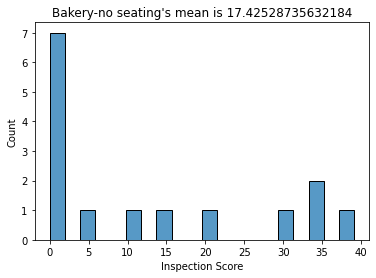

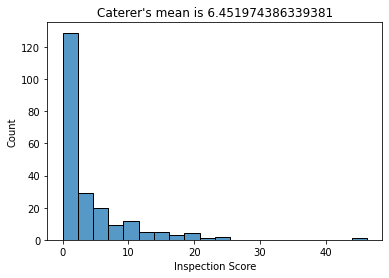

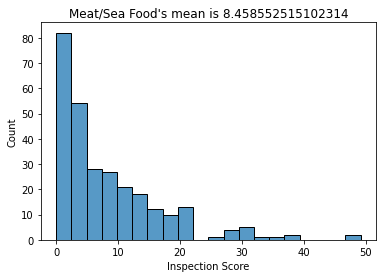

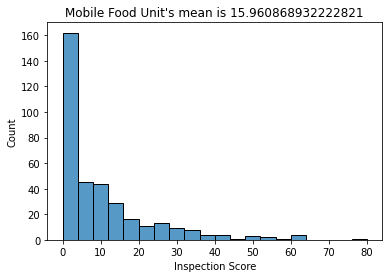

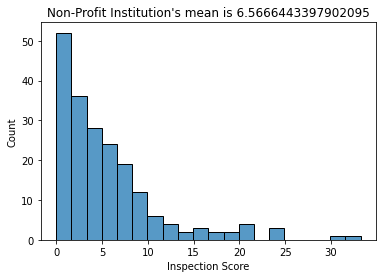

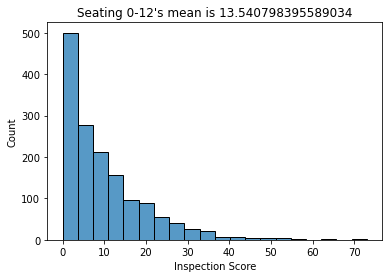

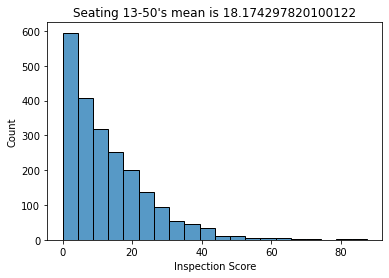

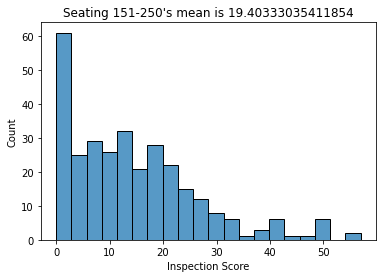

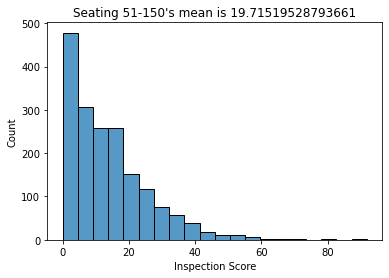

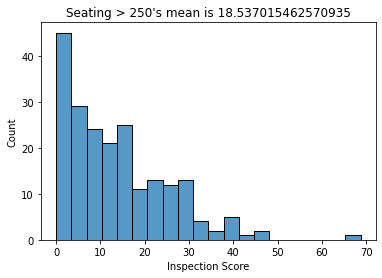

In [129]:

capacity_score3=R3_m.pivot_table(index=['capacity','Name'])

capacities3=['Bakery-no seating','Caterer',
       'Meat/Sea Food', 'Mobile Food Unit', 
       'Non-Profit Institution','Seating 0-12','Seating 13-50','Seating 151-250','Seating 51-150','Seating > 250']

for index,score in enumerate (capacities3):
   plt.title(f"{score}'s mean is {inspection_mean3['Inspection Score'][index]}" )
   sns.histplot(data=capacity_score3.loc[[score]], x="Inspection Score",bins=20)
   plt.show()

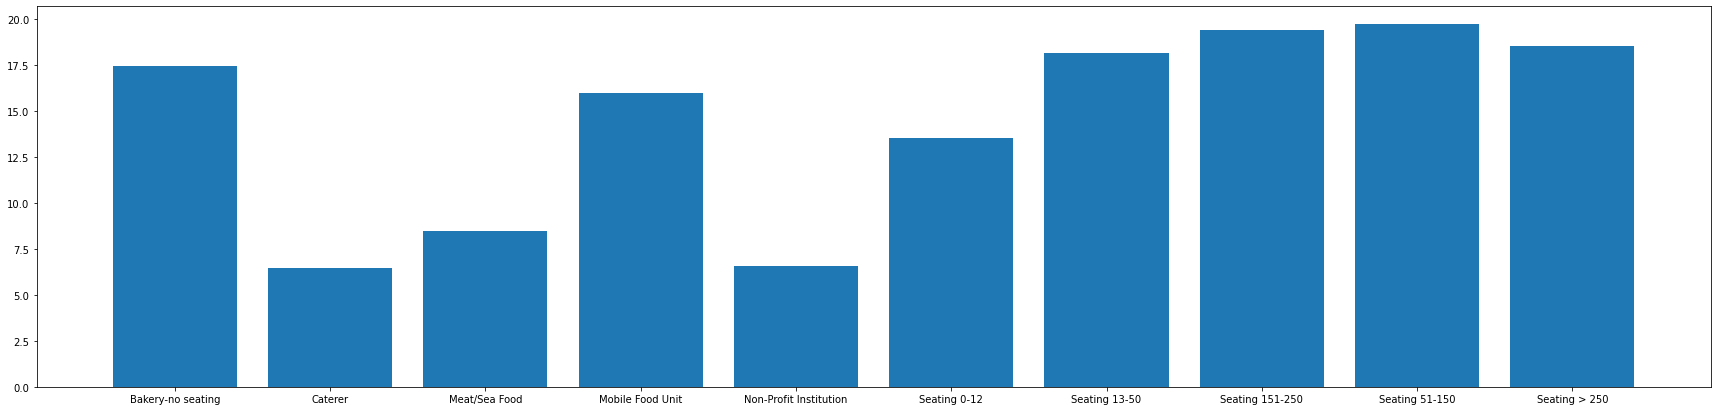

In [130]:
plt.figure(figsize=(30,7))
plt.bar(x=inspection_mean3['capacity'],height=inspection_mean3['Inspection Score'])
plt.show()

<h3>همانطور که پیش بینی می شد با افزایش سطح ریسک نمرات نیز افزایش پیدا کرده
<br>عملکرد رستوران های دارای ظرفیت  در این روند ضعیف تر شده اند<h3>

## Inspection Closed Business

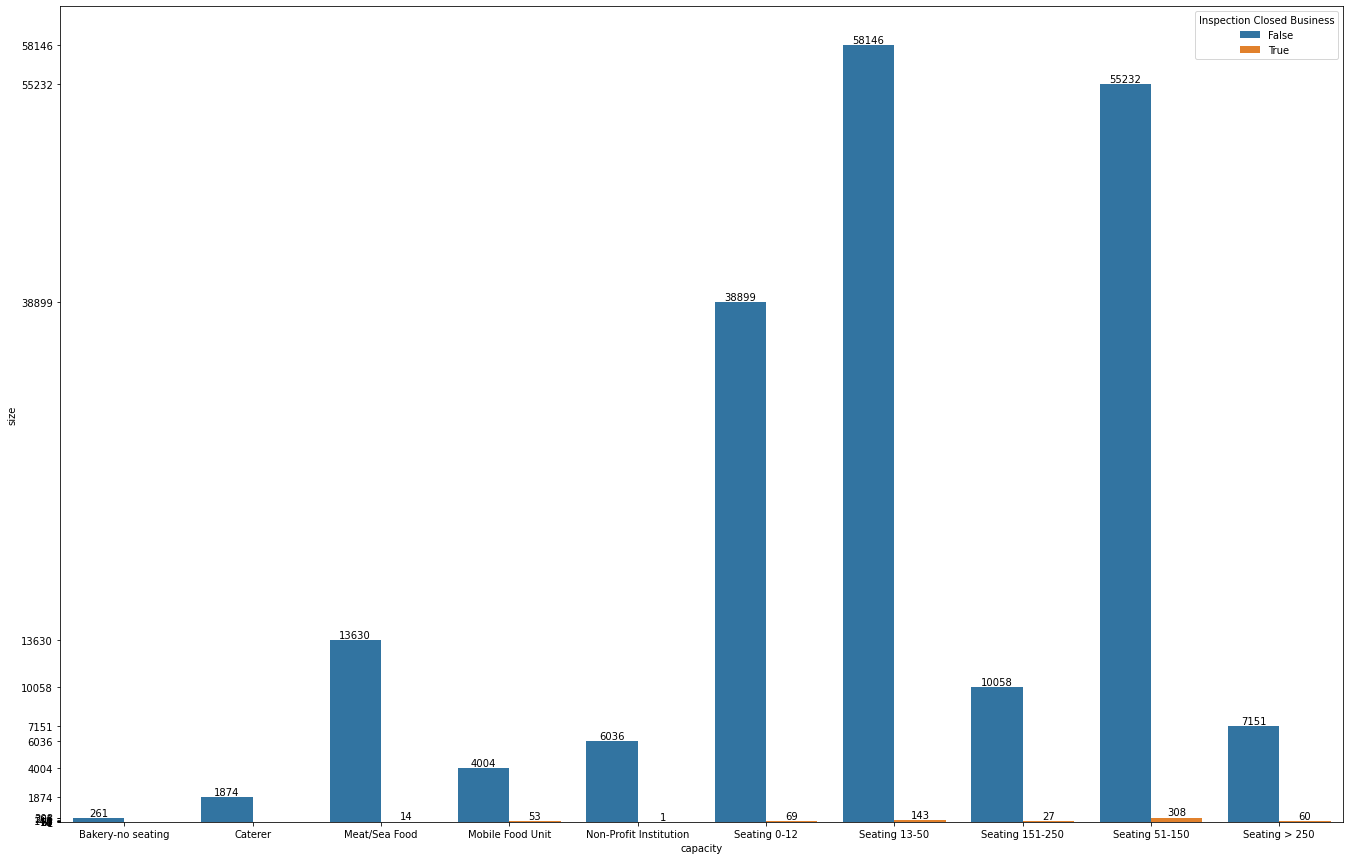

In [151]:
capacity_closed3=R3_m.groupby(by=['capacity','Inspection Closed Business'],as_index=False).size()
plt.figure(figsize=(23,15))
bars=sns.barplot(data=capacity_closed3, x="capacity", y="size", hue="Inspection Closed Business")
plt.yticks(capacity_closed3['size'])
for i in bars.containers:
    bars.bar_label(i,)
plt.show()

In [133]:
capacity_closed3

,capacity,Inspection Closed Business,size
0,Bakery-no seating,False,261
1,Caterer,False,1874
2,Meat/Sea Food,False,13630
3,Meat/Sea Food,True,14
4,Mobile Food Unit,False,4004
5,Mobile Food Unit,True,53
6,Non-Profit Institution,False,6036
7,Non-Profit Institution,True,1
8,Seating 0-12,False,38899
9,Seating 0-12,True,69


<h4>با افزایش سطح ریسک بازرس های به طور جدی تری برای تعطیلی مراکز اقدام می کنند و باتوجه به عملکرد ضغیف مراکز دارای ظرفیت پیش بینی می شد که عمده تعطیلی ها برای این رستوران ها باشد<h4>

In [134]:
mask3=R3_m['Inspection Closed Business']==True
inspection_result3=R3_m[mask3]

inspection_result_size3=inspection_result3.groupby('Inspection Result',as_index=False).size()
inspection_result_size3

,Inspection Result,size
0,Baseline Data,1
1,Complete,19
2,Not Accessible,1
3,Out of Business,1
4,Satisfactory,4
5,Unsatisfactory,649


# موضاعات قابل طرح  
  
۱- آیا این دسته از بیزنس ها دارای اهمیت کمی هستند برای تعطیلی؟<br>
<h5 style='color:orange'>در این دسته میزان تعطیلی ها بیشتر شده است و این میتواند تاییدی باشد بر اینکه<br> 
risk category <br>
برای تعطیلی ها نقش مهمی ایفا می کند
<h5><br>
۲- ایا نمره پایین علت تعطیل نشدن بوده است؟<br>
<h5 style='color:orange'> نمی توان با قطعیت گفت . <h5>
<br>افزایش grade در رستوران های با ظرفیت

## فرضیات

۱- ارنباط مستقیم inspection score و inspection result=Unsatisfactory<br>
۲- شرط لازم برای تعطیلی -Unsatisfactory و - RED<br>
همچنین نمرات بالا inspection score


۴- با افزایش سطح ریسک میزان نمرات نیز افزایش می یابد(inspection score)
<br><h5 style='color:orange'>با افزایش سطح ریسک رستوران های دارای ظرفیت عملکردشان ضعیف تر شده است<h5>

# Risk Category Not Permanent plumbing

In [137]:
NPP=df.loc[df['Category']==0]
NPP.head(1)


,Name,Longitude,Latitude,Inspection Type,Inspection Score,Inspection Result,Inspection Closed Business,Violation Type,Grade,Category,capacity
4464,ACCESSO SHOWARE CENTER,-122.240084,47.387861,Routine Inspection/Field Review,0.0,Satisfactory,False,BLUE,1.0,0,Limited Food Services


## بررسی اولیه دیتا

<h3>این دسته داراس grade 1 می باشد و قابلیت تحلیلی ندارد و حذف می شود<h3>

In [144]:
NPP.Grade.unique()

array([1.])

In [146]:
NPP.drop(['Grade'],axis=1,inplace=True)
NPP.head(2)

KeyError: "['Grade'] not found in axis"

## Inspection Score

<h2>در این مرحله برای بررسی میانگین امتیاز کسب شده توسط گروه های مختلف باید داده های پرت را خارج کنیم<h2>

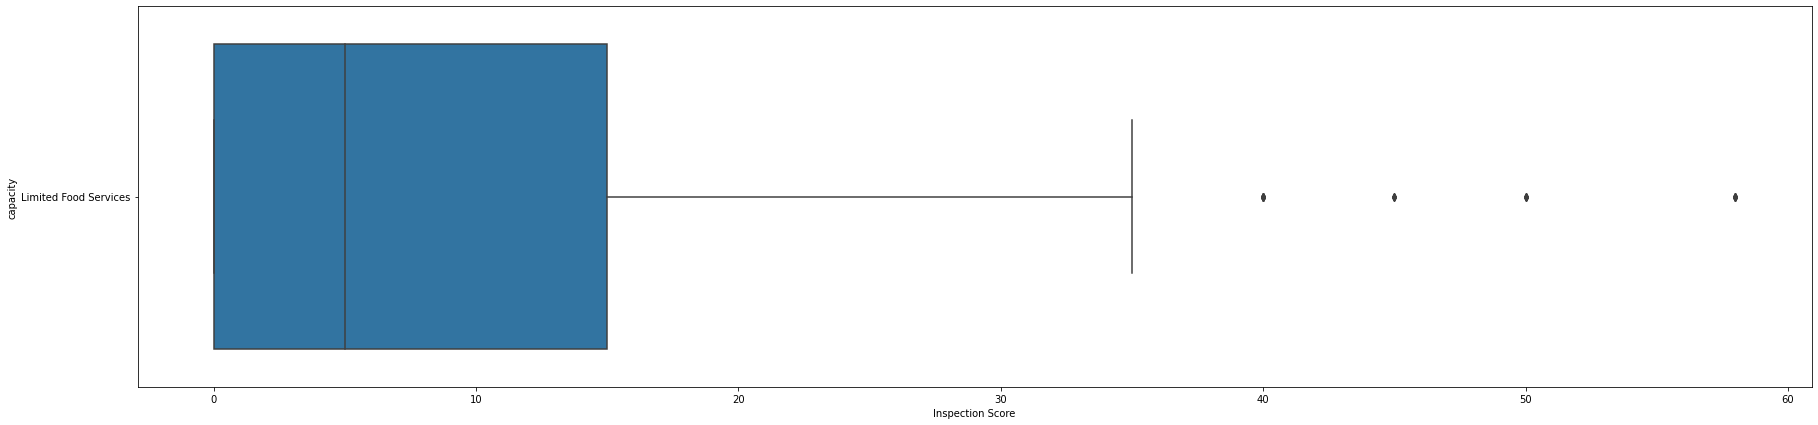

In [147]:

plt.figure(figsize=(30,7))
sns.boxplot(x=NPP["Inspection Score"],y=NPP["capacity"])
plt.show()

In [148]:
inspection_std4=NPP.drop(['Longitude','Latitude','Inspection Closed Business'],axis=1).groupby(by='capacity',as_index=False).std()
inspection_std4

,capacity,Inspection Score,Category
0,Limited Food Services,10.978337,0.0


<h4>داده قابل حذفی وجود ندارد<h4>

In [149]:
inspection_mean4=NPP.drop(['Longitude','Latitude','Inspection Closed Business'],axis=1).groupby(by='capacity',as_index=False).mean()
inspection_mean4


,capacity,Inspection Score,Category
0,Limited Food Services,8.207815,0.0


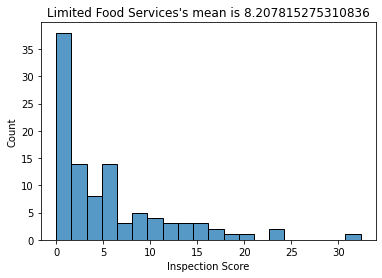

In [150]:

capacity_score4=NPP.pivot_table(index=['capacity','Name'])

capacities4=['Limited Food Services']

for index,score in enumerate (capacities4):
   plt.title(f"{score}'s mean is {inspection_mean4['Inspection Score'][index]}" )
   sns.histplot(data=capacity_score4.loc[[score]], x="Inspection Score",bins=20)
   plt.show()

<h3style='color:green'> باید بررسی شود با کدام دسته مشابهت بیشتری دارد<h3>

## Inspection Closed Business

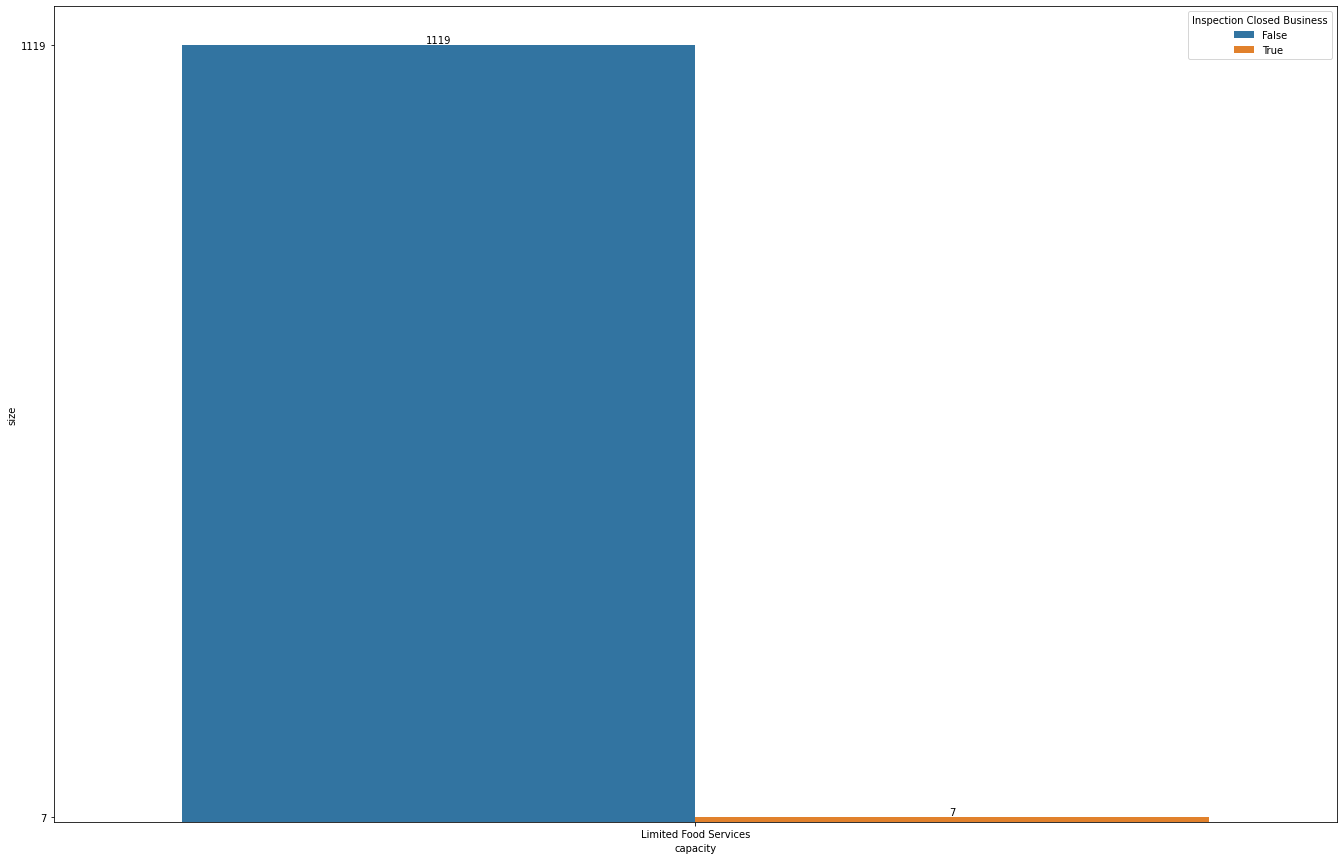

In [152]:
capacity_closed4=NPP.groupby(by=['capacity','Inspection Closed Business'],as_index=False).size()
plt.figure(figsize=(23,15))
bars=sns.barplot(data=capacity_closed4, x="capacity", y="size", hue="Inspection Closed Business")
plt.yticks(capacity_closed4['size'])
for i in bars.containers:
    bars.bar_label(i,)
plt.show()

In [154]:
capacity_closed4

,capacity,Inspection Closed Business,size
0,Limited Food Services,False,1119
1,Limited Food Services,True,7


In [155]:
mask4=NPP['Inspection Closed Business']==True
inspection_result_size4=NPP[mask4]

inspection_result_size4=inspection_result_size4.groupby('Inspection Result',as_index=False).size()
inspection_result_size4

,Inspection Result,size
0,Unsatisfactory,7


# موضاعات قابل طرح  
  
بررسی شود به کدام دسته شبیه است


# conclusion

## موضوعات قابل طرح  
  

<h5 style='color:orange'> با افزایش سطح ریسک، تعطیلی ها بیشتر شده است و این میتواند تاییدی باشد بر اینکه<br> 
risk category <br>
برای تعطیلی ها نقش مهمی ایفا می کند
<h5><br>
۲- ایا نمره پایین علت تعطیل نشدن بوده است؟<br>
<h5 style='color:orange'> نمی توان با قطعیت گفت . <h5>
<br>افزایشی grade در رستوران های با ظرفیت

## فرضیات

۱- ارنباط مستقیم inspection score و inspection result=Unsatisfactory<br>
۲- شرط لازم برای تعطیلی -Unsatisfactory و - RED<br>
همچنین نمرات بالا inspection score


۴- با افزایش سطح ریسک میزان نمرات نیز افزایش می یابد(inspection score)
<br><h5 style='color:orange'>با افزایش سطح ریسک رستوران های دارای ظرفیت عملکردشان ضعیف تر شده است<h5>

## اقدامات

۱-  بررسی رستوران های دارای ظرفیت یکسان در سطوح ریسکی مختلف به منظور بررسی میزان تاثیر سطوح ریسکی در نمره دهی و تعطیلی مراکز<br>
۲- بررسی رستوران های مشترک در سطوح ریسکی مختلف<br>
۳- بررسی تعداد دفعات بازرسی و علل بازرسی در سطوح مختلف ریسکی رستوران های مشترک<br>
۴- بررسی علل تعطیلی رستوران ها با نتایج غیر Unsatisfactory<br>
۵- Risk Category Not Permanent plumbing به کدام دسته نزدیک است؟<br>
 